<a href="https://colab.research.google.com/github/rjain-22/r_jain/blob/main/RohanJain_dsci_352_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


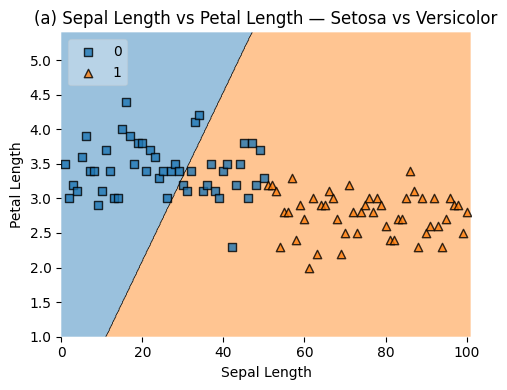

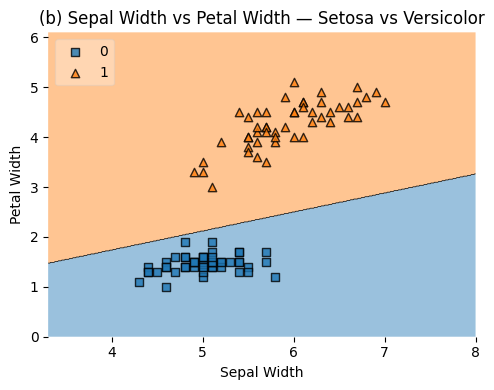

In [10]:
# --- imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# --- Rosenblatt Perceptron (fixed)
class RBPerceptron:
    def __init__(self, number_of_epochs=100, learning_rate=0.1):
        self.number_of_epochs = number_of_epochs
        self.learning_rate = learning_rate
        self.w = None

    def train(self, X, T):
        X = np.asarray(X, dtype=float)
        T = np.asarray(T, dtype=int)

        n_features = X.shape[1]
        self.w = np.zeros(n_features + 1)  # [bias, w1, w2, ...]

        for _ in range(self.number_of_epochs):
            # simple online pass (can shuffle if you want)
            for x, y in zip(X, T):
                pred = self.predict(x)       # returns 0/1
                diff = (y - pred)            # in { -1, 0, +1 }
                # weight updates
                self.w[1:] += self.learning_rate * diff * x
                self.w[0]  += self.learning_rate * diff  # bias term
        return self

    def predict(self, X):
        """Accepts (n_samples, n_features) or (n_features,) and returns 0/1."""
        X = np.asarray(X, dtype=float)
        if X.ndim == 1:
            z = X @ self.w[1:] + self.w[0]
        else:
            z = X @ self.w[1:] + self.w[0]
        return (z > 0).astype(int)

# --- load iris.csv (adjust column names if yours differ)
df = pd.read_csv('iris.csv')

# Try common column names; fall back to first 4 columns + last for label
possible_feature_cols = ['sepal_length','sepal_width','petal_length','petal_width']
if all(c in df.columns for c in possible_feature_cols) and 'species' in df.columns:
    feats = df[possible_feature_cols].to_numpy()
    labels = df['species']
else:
    # assume first 4 columns are features, last is label
    feats = df.iloc[:, :4].to_numpy()
    labels = df.iloc[:, -1]

# Map labels to {0,1} for Setosa vs Versicolor
# Handle either strings or numeric labels gracefully
labels = labels.astype(str).str.lower()
mask = labels.isin(['setosa', 'versicolor', 'iris-setosa', 'iris-versicolor', '0', '1'])
feats = feats[mask]
labels = labels[mask]

# Normalize various spellings to setosa/versicolor
labels = labels.replace({
    'iris-setosa':'setosa',
    'iris-versicolor':'versicolor'
})

# If your csv already uses 0/1, keep that; else map setosa->0, versicolor->1
if set(labels.unique()) <= {'0','1'}:
    y_all = labels.astype(int).to_numpy()
else:
    map_dict = {'setosa':0, 'versicolor':1}
    y_all = labels.map(map_dict)
    # drop anything not in these two
    valid = y_all.notna()
    feats = feats[valid]
    y_all = y_all[valid].astype(int).to_numpy()

# --- (a) Sepal Length vs Petal Length -> columns [0, 2]
Xa = feats[:, [0, 2]]
ya = y_all
rbp_a = RBPerceptron(number_of_epochs=200, learning_rate=0.1).train(Xa, ya)
plt.figure(figsize=(5,4))
plot_decision_regions(Xa, ya.astype(np.int64), clf=rbp_a, legend=2)
plt.title("(a) Sepal Length vs Petal Length — Setosa vs Versicolor")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.tight_layout()
plt.show()

# --- (b) Sepal Width vs Petal Width -> columns [1, 3]
Xb = feats[:, [1, 3]]
yb = y_all
rbp_b = RBPerceptron(number_of_epochs=200, learning_rate=0.1).train(Xb, yb)
plt.figure(figsize=(5,4))
plot_decision_regions(Xb, yb.astype(np.int64), clf=rbp_b, legend=2)
plt.title("(b) Sepal Width vs Petal Width — Setosa vs Versicolor")
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.tight_layout()
plt.show()
